In [1]:
! pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 19.2 MB/s eta 0:00:0000:0100:01


In [2]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import io

In [3]:
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "19.0.2" 2023-01-17; OpenJDK Runtime Environment (build 19.0.2+7-44); OpenJDK 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from /Users/Aashay/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/sb/gnch69q10hb_h3w13x5hmz0h0000gp/T/tmp3zj4wd3g
  JVM stdout: /var/folders/sb/gnch69q10hb_h3w13x5hmz0h0000gp/T/tmp3zj4wd3g/h2o_Aashay_started_from_python.out
  JVM stderr: /var/folders/sb/gnch69q10hb_h3w13x5hmz0h0000gp/T/tmp3zj4wd3g/h2o_Aashay_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_Aashay_59b9fv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [247]:
df = pd.read_csv('https://raw.githubusercontent.com/pawar-aa/NFO6105-33201-Data-Sci-Eng-Methods/main/car_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [248]:
# iterate over each value in the 'car_prices_in_rupee' column
for i, value in enumerate(df['car_prices_in_rupee']):
        # check if the value contains 'Lakh'
        if 'Lakh' in value:
            # replace 'Lakh' with an empty string
            value = value.replace('Lakh', '')
            # convert the value to a float
            value = int(float(value) * 100000)
        # check if the value contains 'Crore'
        elif 'Crore' in value:
            # replace 'Crore' with an empty string
            value = value.replace('Crore', '')
            # convert the value to a float
            value = int(float(value) * 10000000)
        # update the value in the dataframe
        df.at[i, 'car_prices_in_rupee'] = value
        
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace(',', '')
df['car_prices_in_rupee'] = pd.to_numeric(df['car_prices_in_rupee'], errors='coerce')
df.dropna(subset=['car_prices_in_rupee'], inplace=True)
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].astype('int64')
    
df['kms_driven'] = df['kms_driven'].str.replace('kms', '').str.replace(',', '').astype(int)

df['fuel_type'] = df['fuel_type'].str.replace('Cng', '0').str.replace('Diesel', '1').str.replace('Petrol', '2').str.replace('Electric', '3').str.replace('Lpg', '4').astype(int)

df['transmission'] = df['transmission'].str.replace('Manual', '0').str.replace('Automatic', '1').astype(int)
    
df['ownership'] = df['ownership'].replace({'1st Owner': 1, '2nd Owner': 2,'3rd Owner': 3, '4th Owner': 4, '5th Owner': 5, '0th Owner': 0}).astype(int)

df['engine'] = df['engine'].str.replace('cc', '').astype(int)

df['Seats'] = df['Seats'].str.replace('Seats', '').astype(int)
                                            

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           123 non-null    int64 
 1   car_name             123 non-null    object
 2   car_prices_in_rupee  123 non-null    int64 
 3   kms_driven           123 non-null    int64 
 4   fuel_type            123 non-null    int64 
 5   transmission         123 non-null    int64 
 6   ownership            123 non-null    int64 
 7   manufacture          123 non-null    int64 
 8   engine               123 non-null    int64 
 9   Seats                123 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 10.6+ KB


In [250]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
238,238,Maruti Swift 1.3 LXI,99999,80000,2,0,3,2007,1298,5
243,243,Maruti Zen LX,55000,90000,2,0,3,2002,993,5
342,342,Maruti Alto LXi BSIII,84778,70229,2,0,4,2008,796,5
675,675,Maruti Esteem VX - BSII,59000,60000,2,0,1,2007,1497,5
734,734,Hyundai Santro Xing GL,90000,80000,2,0,2,2008,2993,5


In [251]:
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [252]:
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [253]:
data.head()

Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
238,Maruti Swift 1.3 LXI,99999,80000,2,0,3,2007,1298,5
243,Maruti Zen LX,55000,90000,2,0,3,2002,993,5
342,Maruti Alto LXi BSIII,84778,70229,2,0,4,2008,796,5
675,Maruti Esteem VX - BSII,59000,60000,2,0,1,2007,1497,5
734,Hyundai Santro Xing GL,90000,80000,2,0,2,2008,2993,5
743,Chevrolet Spark 1.0 LT,99205,84489,2,0,3,2011,1493,5
852,Tata Nano Cx,60000,16700,2,0,2,2010,2523,5
930,Maruti Alto LX,65000,60000,2,0,2,2005,1998,5
934,Maruti Zen Estilo 1.1 LX BSIII,89000,29081,2,0,3,2006,2179,5
941,Maruti 800 Std MPFi,65000,80000,2,0,2,2003,1599,5


In [254]:
# We're splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split

np.random.seed(0)
cars_train,cars_test = train_test_split(df, test_size=0.3, random_state=100)

# We'll perform feature scaling to ensure normalization of the data within a particular range.
#Sometimes, it also helps in speeding up the calculations in an algorithm.
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#features we need to scale are assigned as a list.
temp=['car_prices_in_rupee', 'kms_driven']

#scaling the training data(fitting the parameters and transforming the values)
cars_train[temp]=scaler.fit_transform(cars_train[temp])

#transforming the test data.We avoid fitting the values to prevent data leakage!
cars_test[temp]=scaler.transform(cars_test[temp])

#We will drop the Car_Name column from training and test data because it only has text info that the linear regression model can't use!

X_test=cars_test.drop(columns=['car_name', 'car_prices_in_rupee'],axis=1)
y_test=cars_test['car_prices_in_rupee']

X_train=cars_train.drop(columns=['car_name', 'car_prices_in_rupee'],axis=1)
y_train=cars_train['car_prices_in_rupee']

In [255]:
#importing libraries for ols regression
import statsmodels.api as sm

In [256]:
#finding dependencies of independent variable on target variable using OLS regression model

model = sm.OLS(df['car_prices_in_rupee'], df[['kms_driven','ownership']]).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_prices_in_rupee   R-squared (uncentered):                   0.852
Model:                             OLS   Adj. R-squared (uncentered):              0.850
Method:                  Least Squares   F-statistic:                              349.5
Date:                 Tue, 28 Feb 2023   Prob (F-statistic):                    5.31e-51
Time:                         20:09:26   Log-Likelihood:                         -1441.8
No. Observations:                  123   AIC:                                      2888.
Df Residuals:                      121   BIC:                                      2893.
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
kms_driven     0.4275      0.057      7.448      0.000       0.314       0.541
ownership   1.574e+04   2076.346      7.578      0.000    1.16e+04    1.98e+04
==============================================================================
Omnibus:                        9.272   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.455
Skew:                          -0.558   Prob(JB):                      0.00885
Kurtosis:                       3.774   Cond. No.                     6.64e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
#finding dependencies of independent variable on target variable after dropping Owner feature using OLS regression model

model = sm.OLS(df['car_prices_in_rupee'], df[['kms_driven']]).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     car_prices_in_rupee   R-squared (uncentered):                   0.782
Model:                             OLS   Adj. R-squared (uncentered):              0.781
Method:                  Least Squares   F-statistic:                              438.6
Date:                 Tue, 28 Feb 2023   Prob (F-statistic):                    3.23e-42
Time:                         20:09:29   Log-Likelihood:                         -1465.7
No. Observations:                  123   AIC:                                      2933.
Df Residuals:                      122   BIC:                                      2936.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
kms_driven     0.7922      0.038     20.943      0.000       0.717       0.867
==============================================================================
Omnibus:                       26.385   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.629
Skew:                          -0.943   Prob(JB):                     4.54e-11
Kurtosis:                       5.395   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
#finding dependencies of independent variable on target variable using correlation matrix
df.corr()

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
Unnamed: 0,1.000000,-0.102668,0.219193,-0.150849,0.016327,-0.061659,0.218414,-0.092606,-0.041531
car_prices_in_rupee,-0.102668,1.000000,0.044721,-0.049816,0.076434,0.117735,0.258641,-0.082182,-0.074466
kms_driven,0.219193,0.044721,1.000000,-0.078686,-0.043921,0.159033,-0.081776,-0.016314,-0.161342
fuel_type,-0.150849,-0.049816,-0.078686,1.000000,-0.001380,-0.059375,0.058152,0.178496,0.161365
transmission,0.016327,0.076434,-0.043921,-0.001380,1.000000,0.157661,-0.077328,-0.047329,-0.152547
ownership,-0.061659,0.117735,0.159033,-0.059375,0.157661,1.000000,0.123295,-0.023737,0.049530
manufacture,0.218414,0.258641,-0.081776,0.058152,-0.077328,0.123295,1.000000,0.160428,-0.006075
engine,-0.092606,-0.082182,-0.016314,0.178496,-0.047329,-0.023737,0.160428,1.000000,0.003786
Seats,-0.041531,-0.074466,-0.161342,0.161365,-0.152547,0.049530,-0.006075,0.003786,1.000000


<AxesSubplot:>

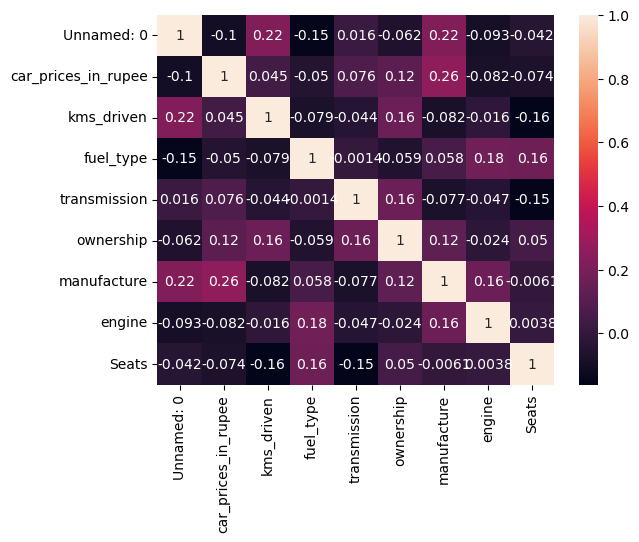

In [259]:
#plotting heatmap to check correlation of features
sns.heatmap(df.corr(),annot=True)

In [260]:
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [261]:
data.head()

Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
238,Maruti Swift 1.3 LXI,99999,80000,2,0,3,2007,1298,5
243,Maruti Zen LX,55000,90000,2,0,3,2002,993,5
342,Maruti Alto LXi BSIII,84778,70229,2,0,4,2008,796,5
675,Maruti Esteem VX - BSII,59000,60000,2,0,1,2007,1497,5
734,Hyundai Santro Xing GL,90000,80000,2,0,2,2008,2993,5
743,Chevrolet Spark 1.0 LT,99205,84489,2,0,3,2011,1493,5
852,Tata Nano Cx,60000,16700,2,0,2,2010,2523,5
930,Maruti Alto LX,65000,60000,2,0,2,2005,1998,5
934,Maruti Zen Estilo 1.1 LX BSIII,89000,29081,2,0,3,2006,2179,5
941,Maruti 800 Std MPFi,65000,80000,2,0,2,2003,1599,5


In [262]:
y = "car_prices_in_rupee" 
x = data.columns 

In [263]:
target=y

splits = data.split_frame(ratios=[0.75], seed=1)  

train = splits[0]
test = splits[1]

print ("Rows in Train",train.nrow)
print ("Rows in Test",test.nrow)

Rows in Train 98
Rows in Test 25


In [264]:
# Set up AutoML
import time
aml = H2OAutoML(max_runtime_secs=60)

In [265]:
# set model start time and train the aml model
model_start_time = time.time()
aml.train(x=x,y=y,training_frame=data)

AutoML progress: |
20:11:32.403: AutoML: XGBoost is not available; skipping it.
20:11:32.461: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 123.0.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20230228_201132_model_18


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    31                 31                          2699                   0            3            0.935484      1             4             1.96774

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 189541934.3081174
RMSE: 13767.422936342058
MAE: 11209.581300813008
RMSLE: 0.21147396704233823
Mean Residual Deviance: 189541934.3081174

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 268844110.8189021
RMSE: 16396.466412581158
MAE: 13518.04476797511
RMSLE: 0.24707097986155244
Mean Residual Deviance: 268844110.8189021

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     13551.9      679.964      14181.7       13488.5       12704.9       14280.5       13104.2
mean_residual_deviance  2.70838e+08  3.00529e+07  2.9717e+08    2.38815e+08   2.55655e+08   3.08159e+08   2.54392e+08
mse                     2.70838e+08  3.00529e+07  2.9717e+08    2.38815e+08   2.55655e+08   3.08159e+08   2.54392e+08
r2                      -0.0058488   0.163261     0.084751      0.035337      0.126091      0.0115001     -0.286923
residual_deviance       2.70838e+08  3.00529e+07  2.9717e+08    2.38815e+08   2.55655e+08   3.08159e+08   2.54392e+08
rmse                    16437.1      907.788      17238.6       15453.6       15989.2       17554.5       15949.7
rmsle                   0.246796     0.0271518    0.260953      0.212788      0.247416      0.282931      0.229891

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-02-28 20:11:35  1.390 sec   0                  16851.1          14003.3         2.83961e+08
    2023-02-28 20:11:35  1.393 sec   5                  16558.7          13799.2         2.74189e+08
    2023-02-28 20:11:35  1.396 sec   10                 15722.3          13098           2.47191e+08
    2023-02-28 20:11:35  1.398 sec   15                 15584.9          12930           2.42888e+08
    2023-02-28 20:11:35  1.400 sec   20                 13964.4          11398.4         1.95004e+08
    2023-02-28 20:11:35  1.402 sec   25                 13870.1          11321.9         1.92379e+08
    2023-02-28 20:11:35  1.404 sec   30                 13767.4          11209.6         1.89542e+08
    2023-02-28 20:11:35  1.405 sec   31                 13767.4          11209.6         1.89542e+08

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
car_name      3.68683e+10            1                    0.684161
Unnamed: 0    7.19067e+09            0.195036             0.133436
manufacture   5.50676e+09            0.149363             0.102188
kms_driven    1.71764e+09            0.0465885            0.031874
ownership     1.55799e+09            0.0422581            0.0289113
engine        1.04703e+09            0.0283992            0.0194296
fuel_type     0                      0                    0
transmission  0                      0                    0
Seats         0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` t

In [266]:
# printing the leaderBoard for models used
print(aml.leaderboard)

model_id                                                    rmse          mse      mae     rmsle    mean_residual_deviance
GBM_grid_1_AutoML_2_20230228_201132_model_18             16396.5  2.68844e+08  13518    0.247071               2.68844e+08
GBM_grid_1_AutoML_2_20230228_201132_model_7              16437.1  2.70179e+08  13551.9  0.247785               2.70179e+08
GBM_grid_1_AutoML_2_20230228_201132_model_10             16493.8  2.72044e+08  13335.7  0.246068               2.72044e+08
StackedEnsemble_BestOfFamily_4_AutoML_2_20230228_201132  16501.3  2.72294e+08  13276.2  0.248877               2.72294e+08
XRT_1_AutoML_2_20230228_201132                           16542.3  2.73648e+08  13836.8  0.24367                2.73648e+08
GBM_grid_1_AutoML_2_20230228_201132_model_9              16627.7  2.76481e+08  13739.7  0.249721               2.76481e+08
GBM_grid_1_AutoML_2_20230228_201132_model_2              16678.5  2.78174e+08  13819.9  0.250021               2.78174e+08
GBM_grid_1_AutoM

In [267]:
# predicting on test data
prediction = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [268]:
prediction.head()

predict
81239.1
68531.6
71740
79690.4
80733.4
69971.5
71489.5
82333.2
78216.5
81861.9


In [269]:
# Finding & storing the best model
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [270]:
# Printing best model
best_model.algo

'gbm'

In [271]:
# performance of the gbm model
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 136927699.11890075
RMSE: 11701.6109625513
MAE: 9603.08809273263
RMSLE: 0.17280674734240561
Mean Residual Deviance: 136927699.11890075

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_1_AutoML_2_20230228_201132_model_2,1155.2,1.33449e+06,826.493,0.0184212,1.33449e+06,1838,0.003456,DeepLearning
DeepLearning_grid_1_AutoML_2_20230228_201132_model_3,1504.7,2.26413e+06,1153.94,0.0239998,2.26413e+06,1411,0.005723,DeepLearning
DeepLearning_grid_1_AutoML_2_20230228_201132_model_1,2729.7,7.45128e+06,1966.21,0.0371961,7.45128e+06,2593,0.005642,DeepLearning
GBM_grid_1_AutoML_2_20230228_201132_model_23,2773.35,7.69148e+06,2308.95,0.0455418,7.69148e+06,34,0.005277,GBM
GBM_grid_1_AutoML_2_20230228_201132_model_33,3366.79,1.13353e+07,2639.55,0.0561439,1.13353e+07,60,0.006437,GBM
GBM_grid_1_AutoML_2_20230228_201132_model_17,3629.28,1.31717e+07,2886.11,0.0597928,1.31717e+07,24,0.004447,GBM
GBM_5_AutoML_2_20230228_201132,4090.37,1.67312e+07,3312.69,0.0678054,1.67312e+07,58,0.005732,GBM
GBM_grid_1_AutoML_2_20230228_201132_model_37,5206.3,2.71055e+07,3792.07,0.0872468,2.71055e+07,32,0.004194,GBM
GBM_grid_1_AutoML_2_20230228_201132_model_8,5667.67,3.21225e+07,3837.84,0.092862,3.21225e+07,35,0.005139,GBM
GBM_grid_1_AutoML_2_20230228_201132_model_27,6055.1,3.66642e+07,4441.33,0.0938925,3.66642e+07,38,0.003621,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

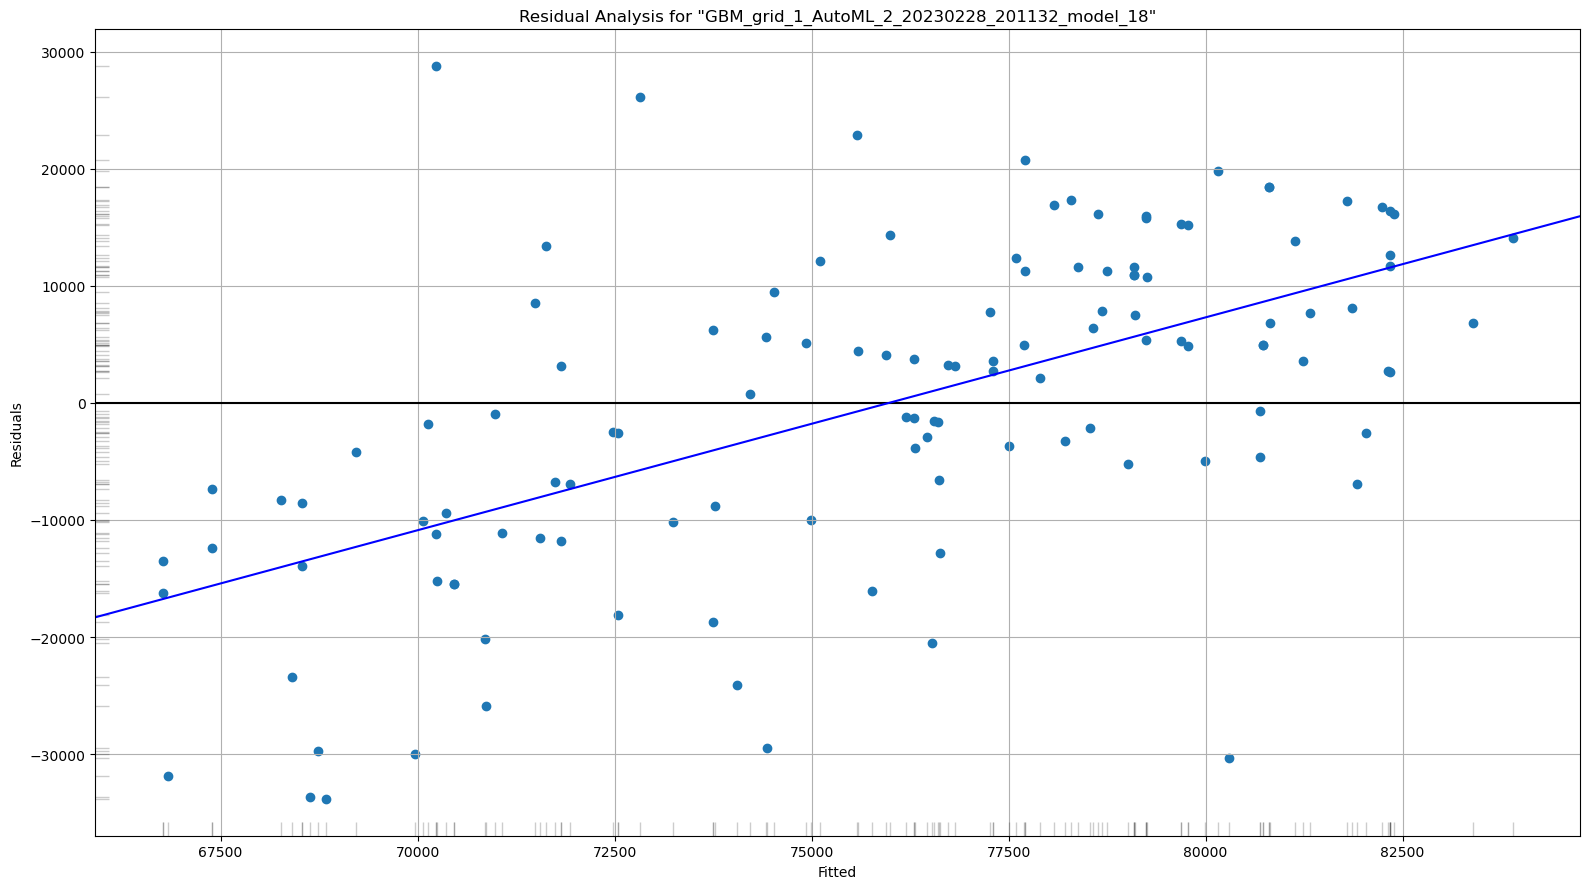

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

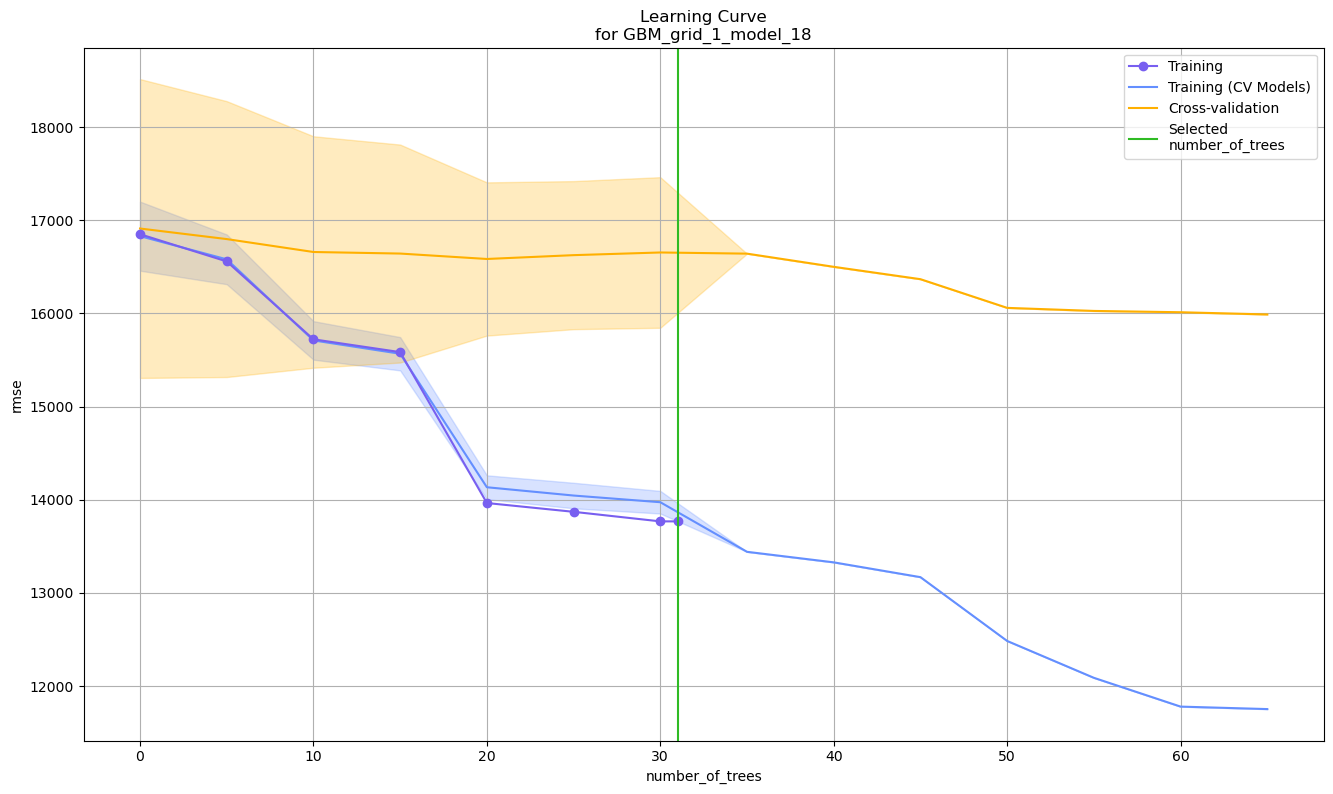

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

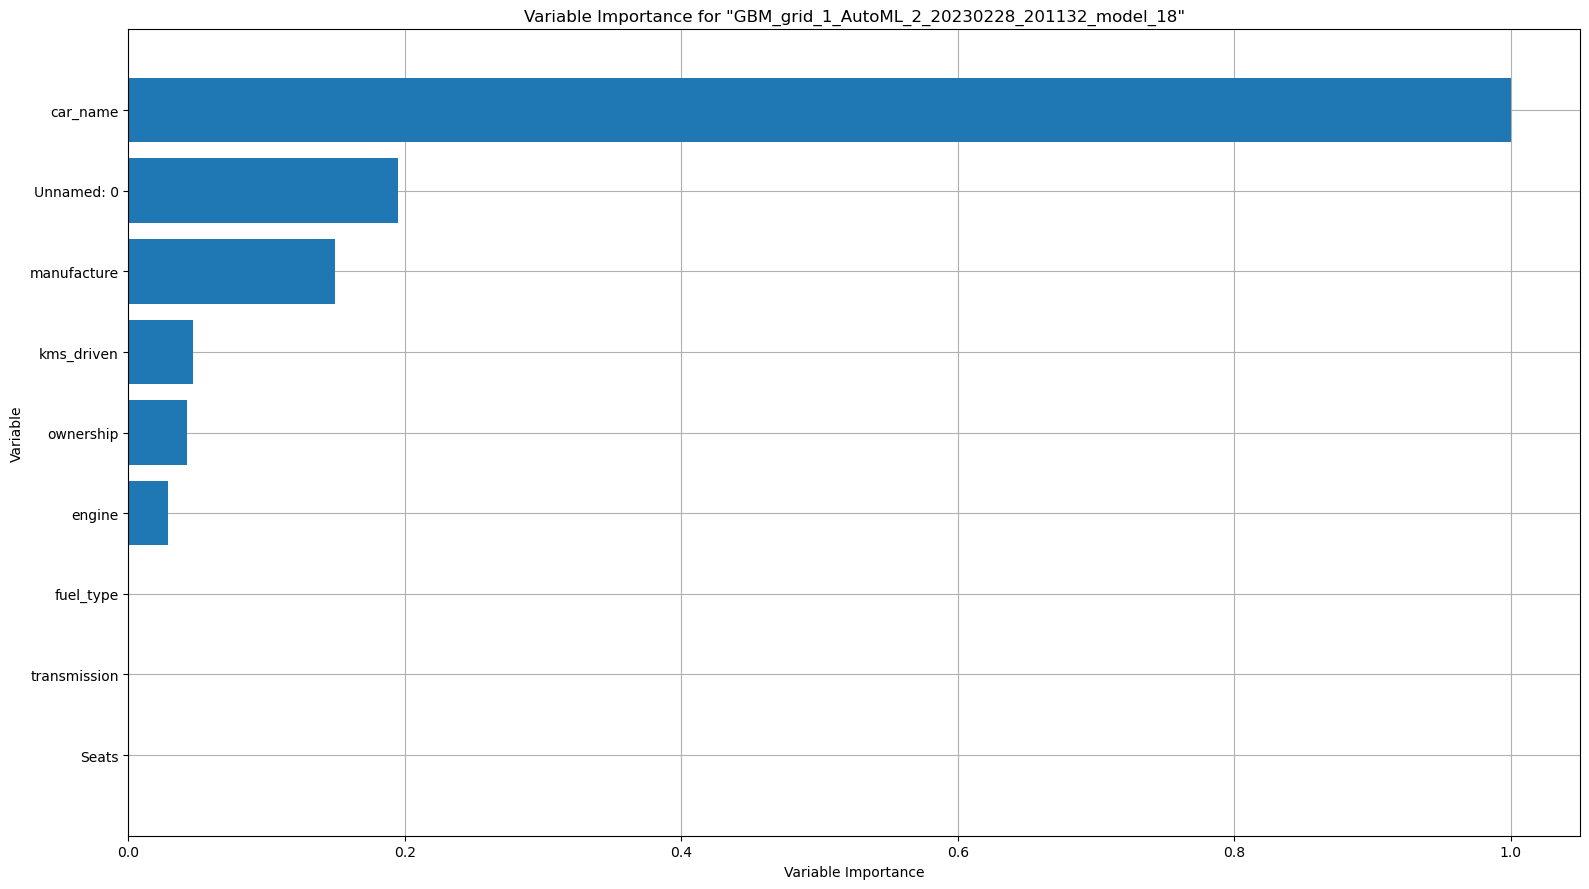

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

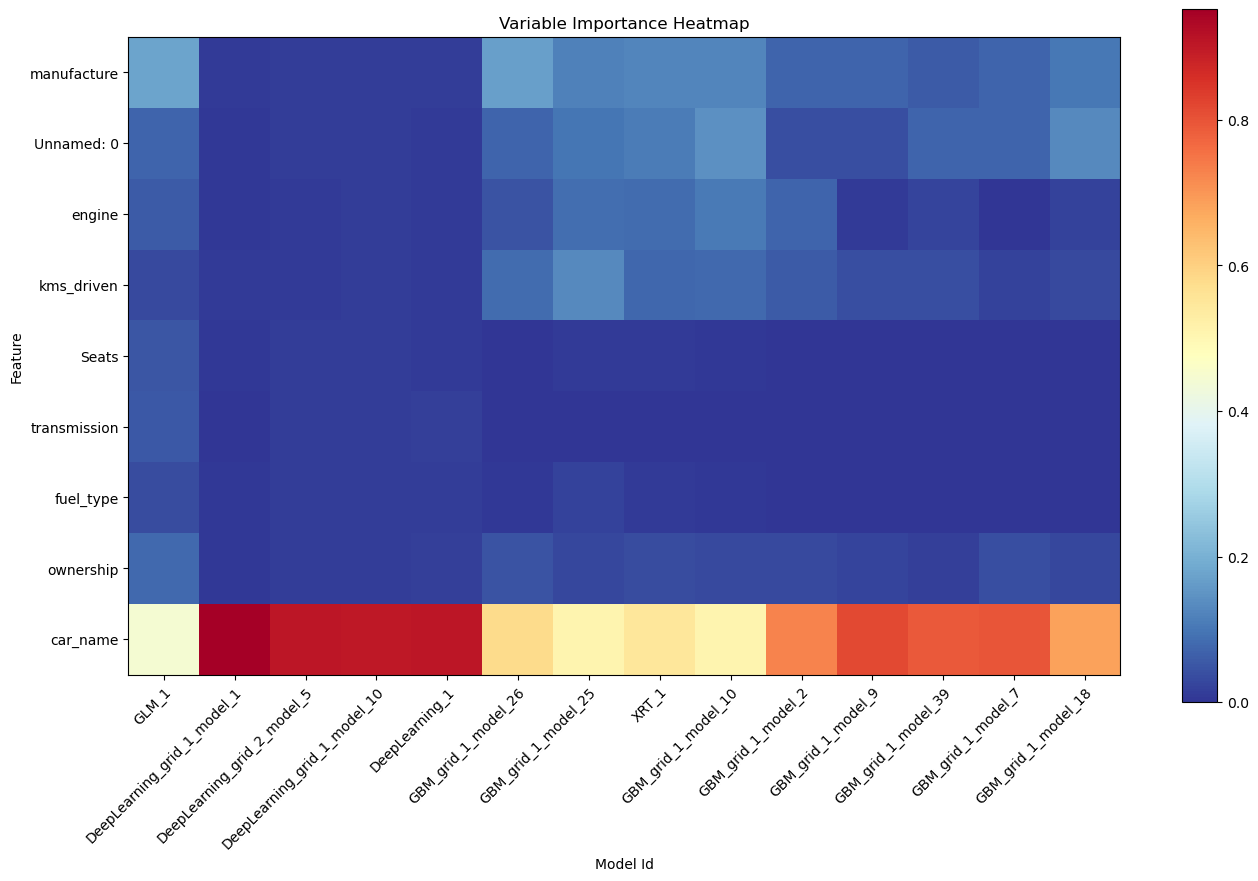

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

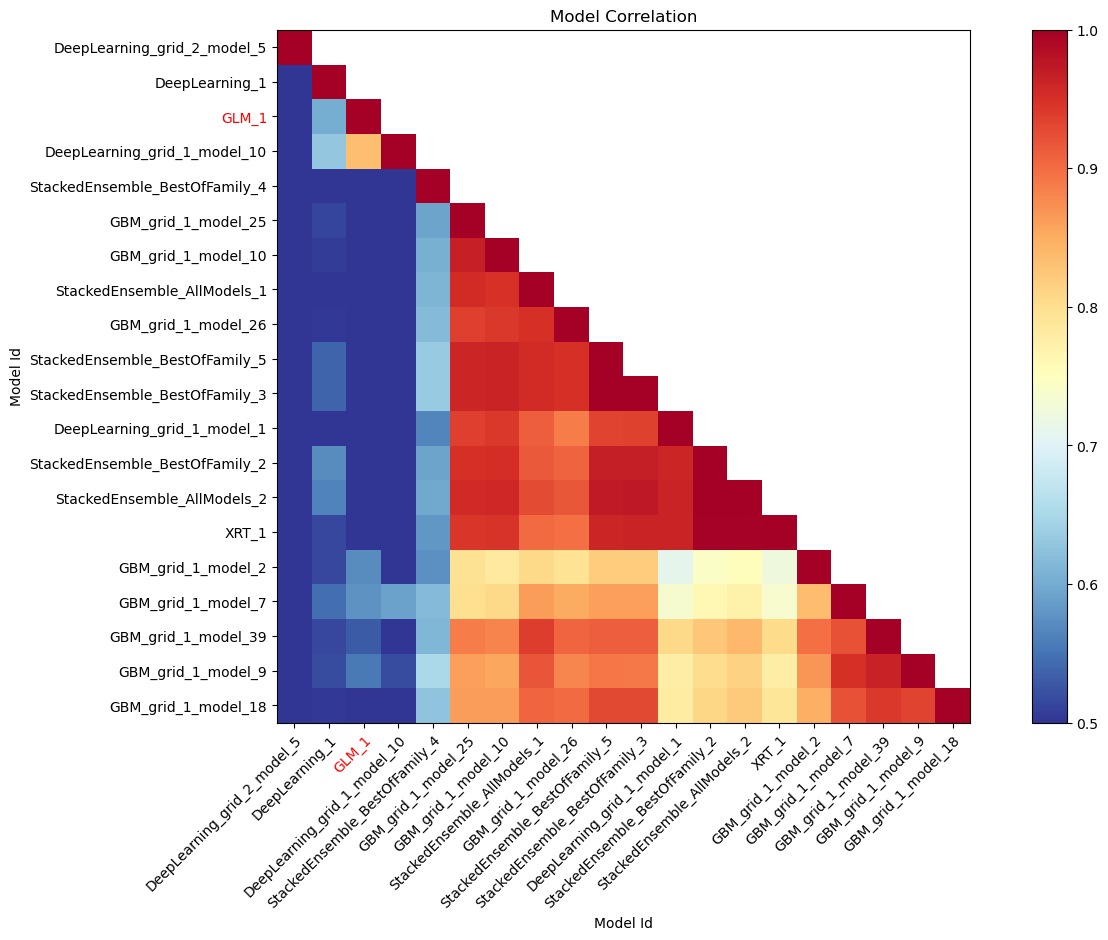

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

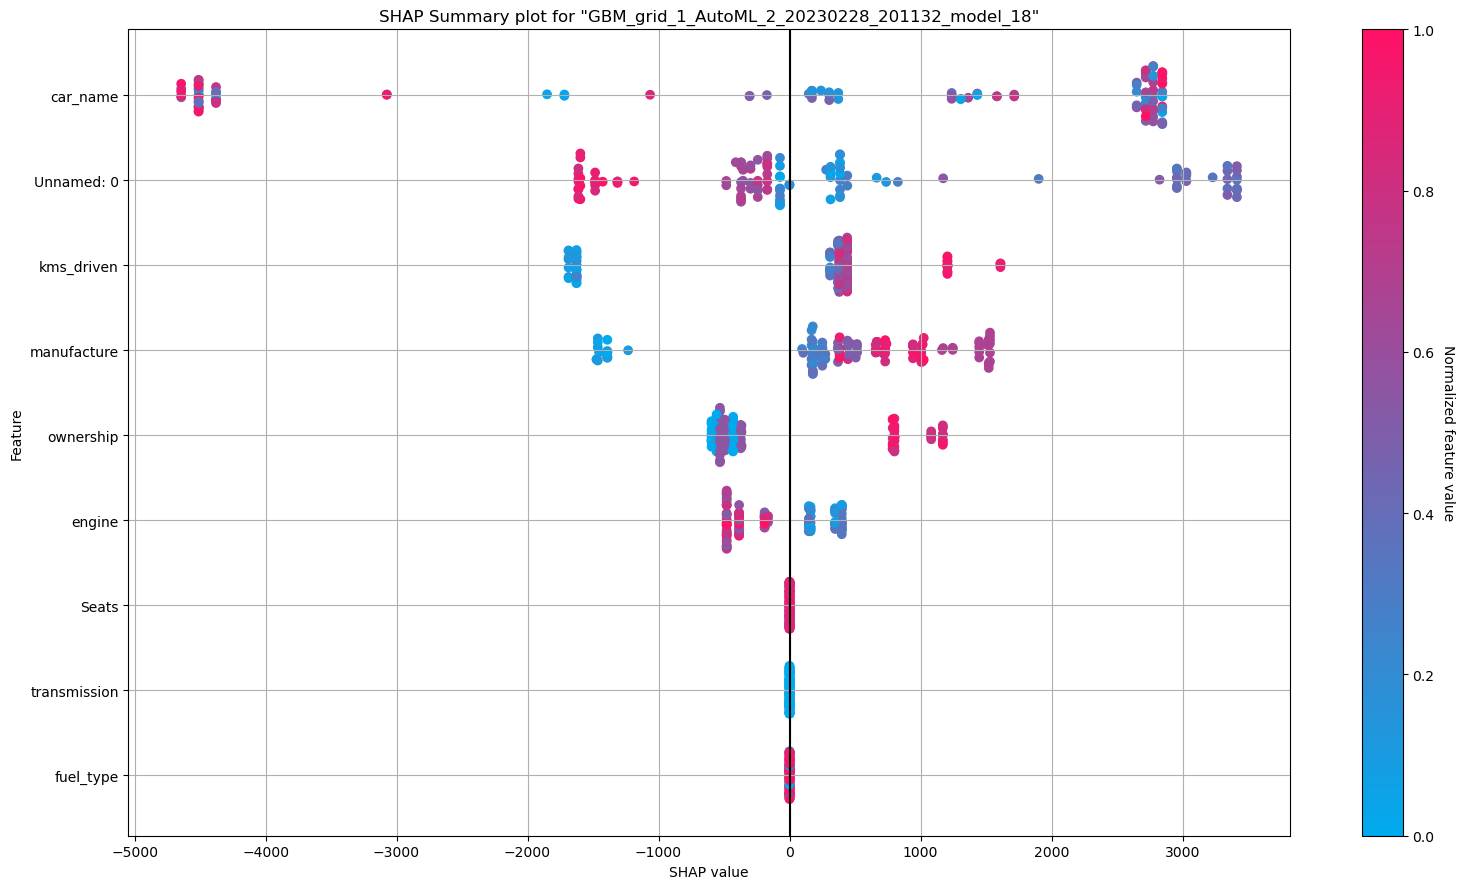

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

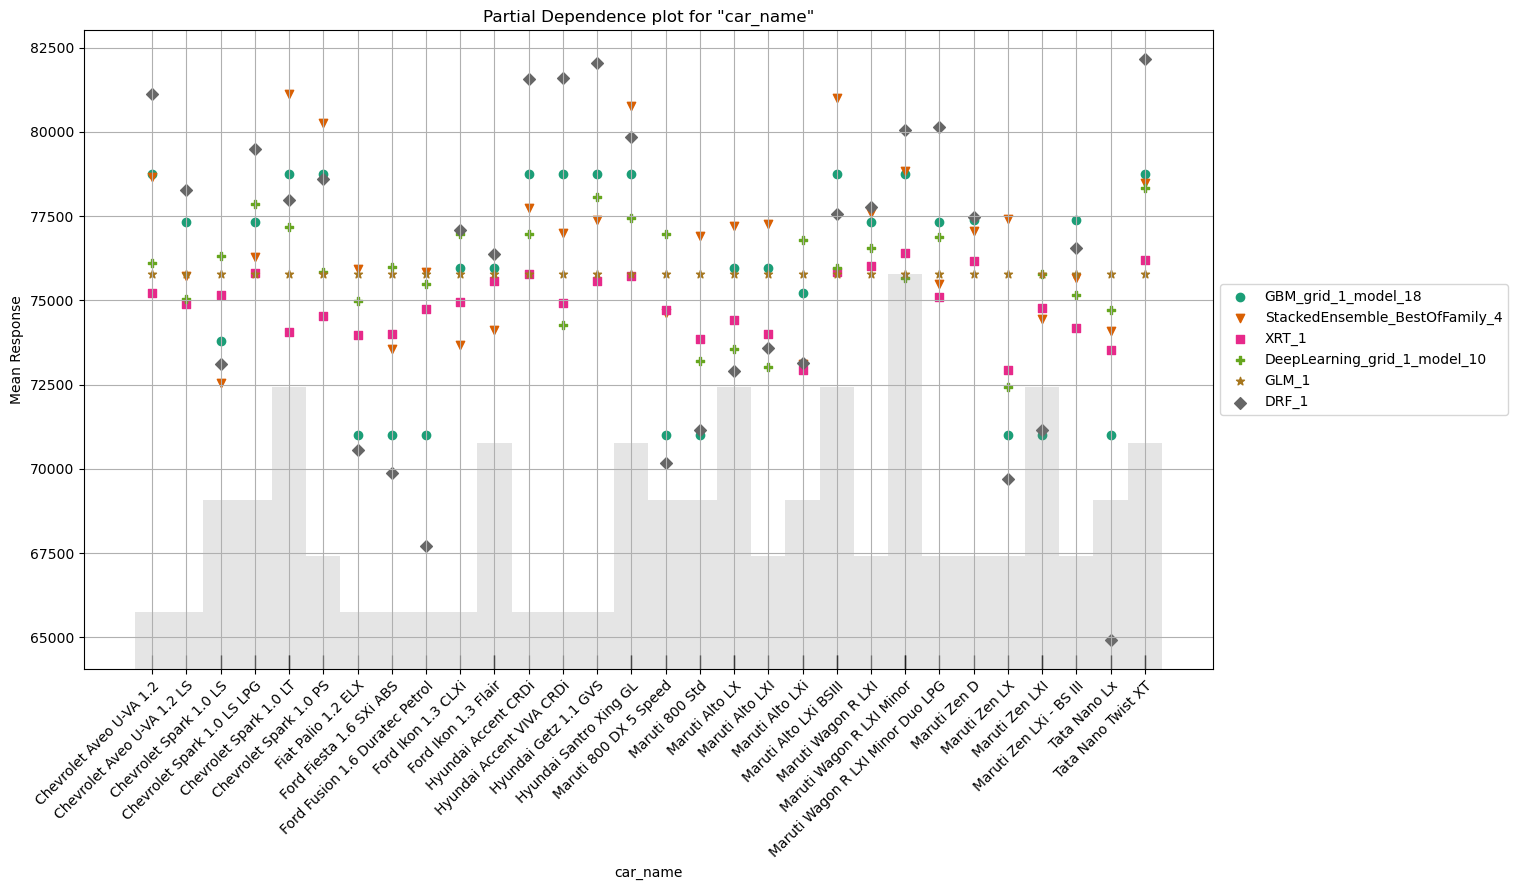

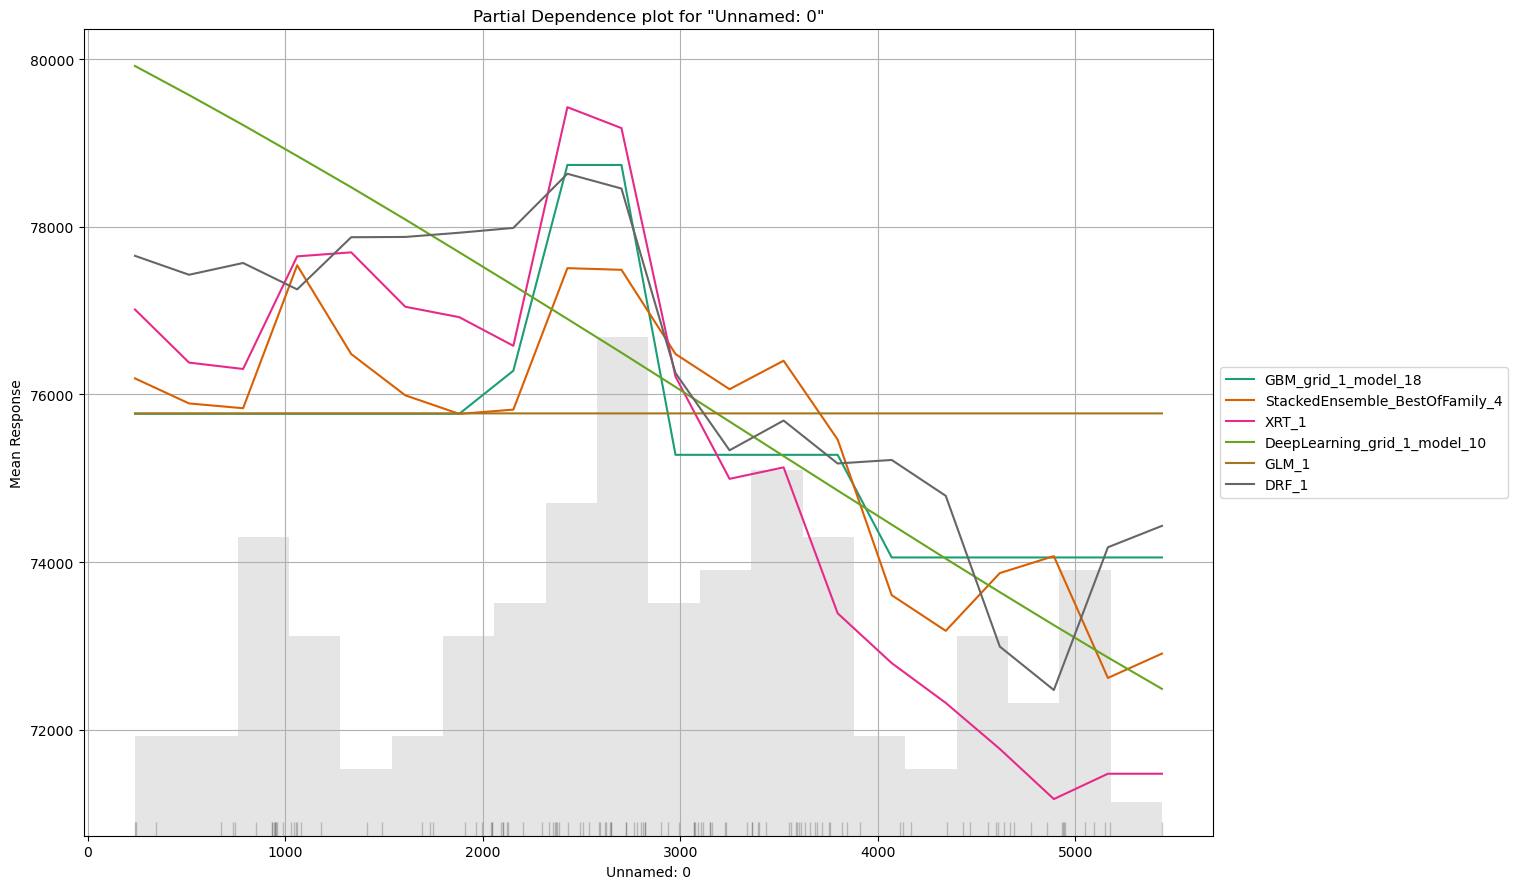

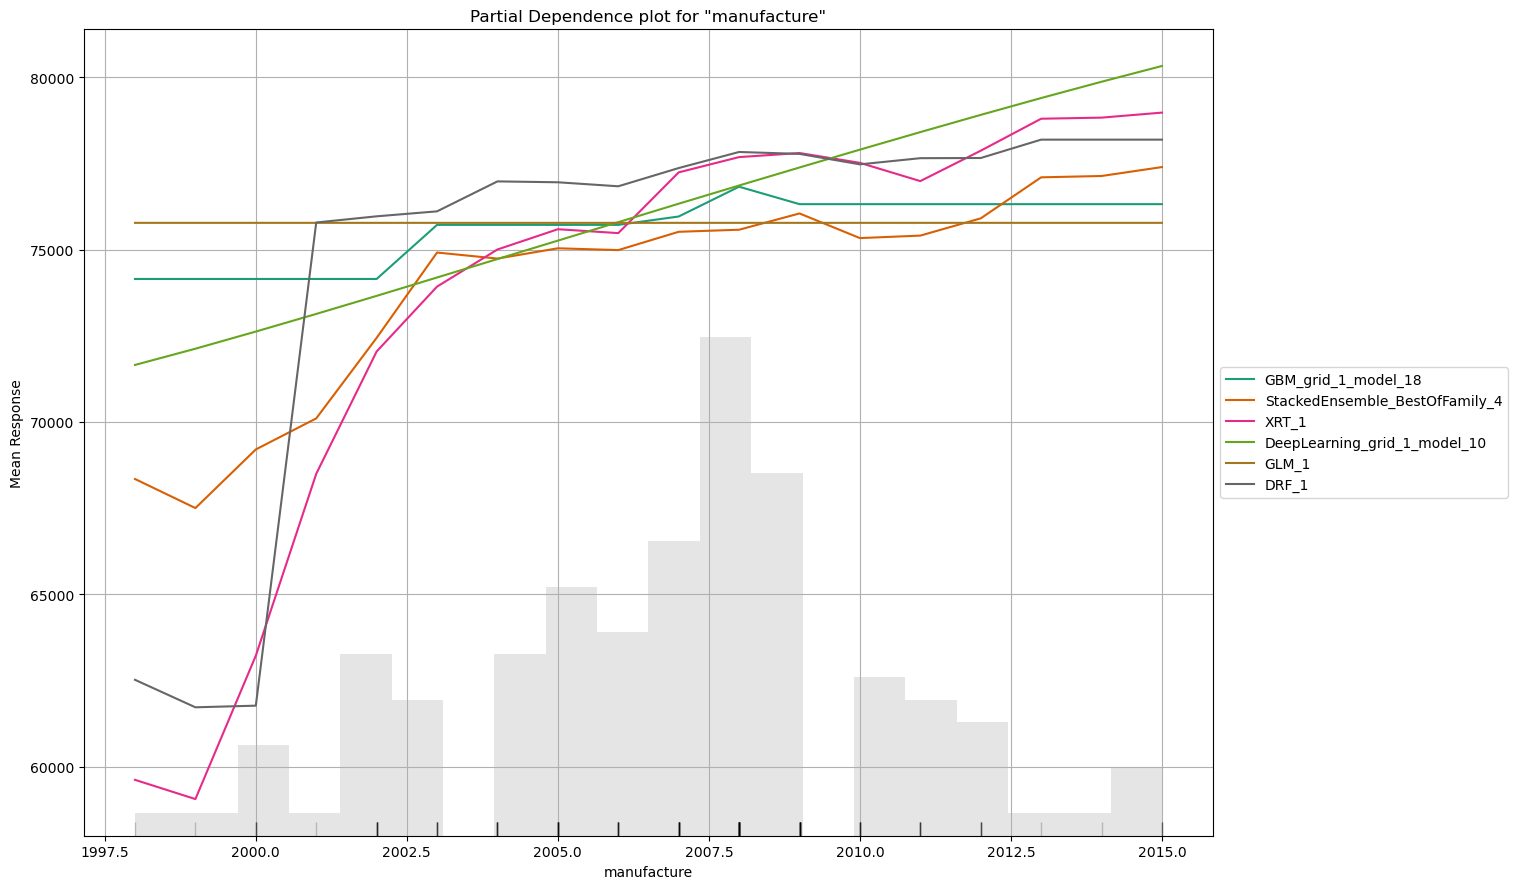

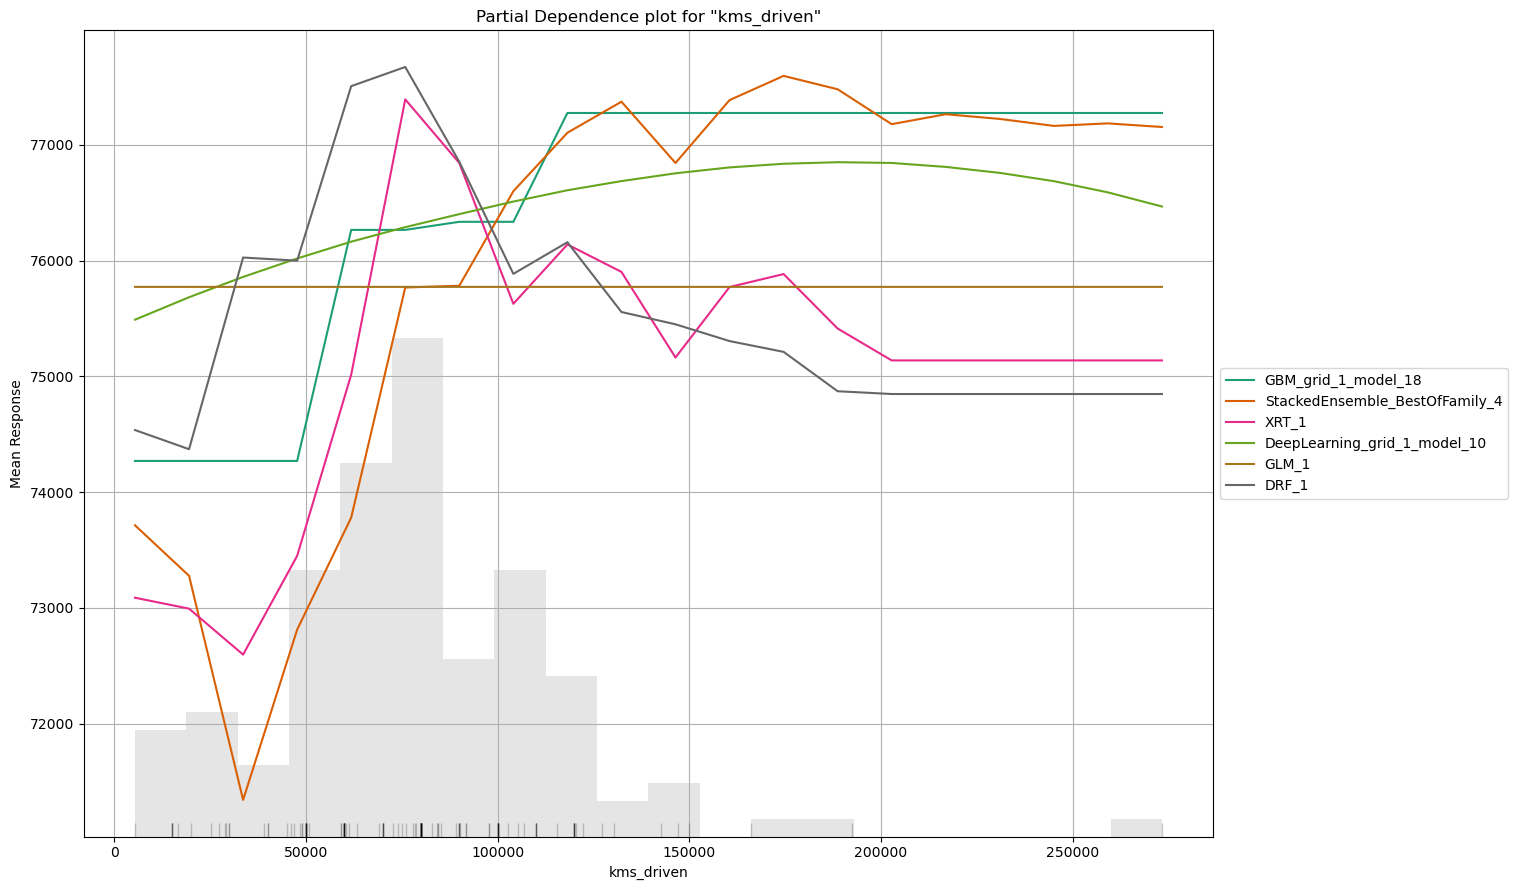

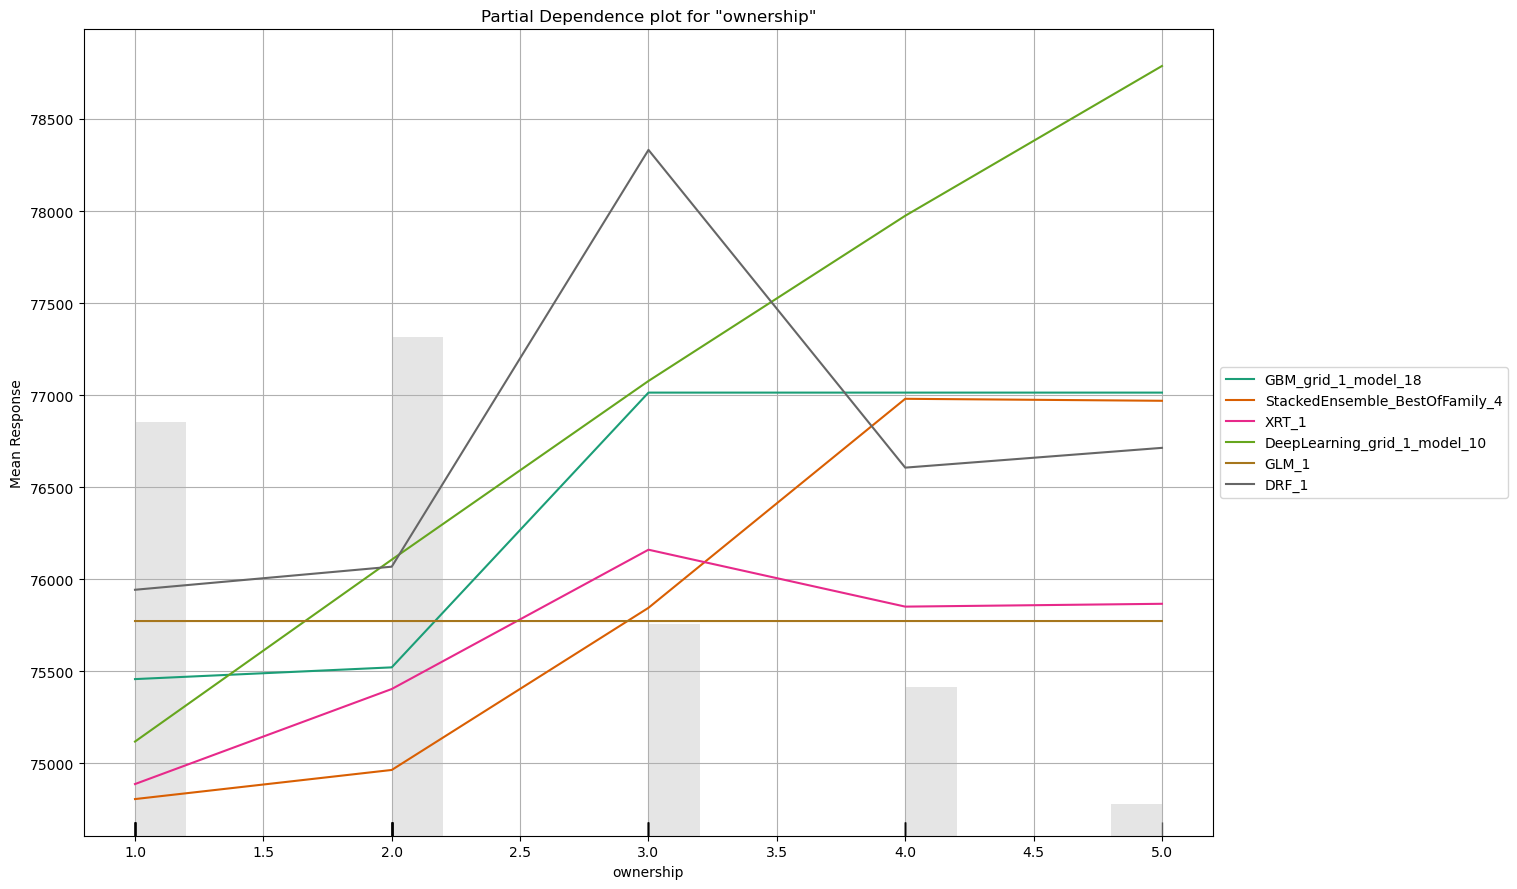

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

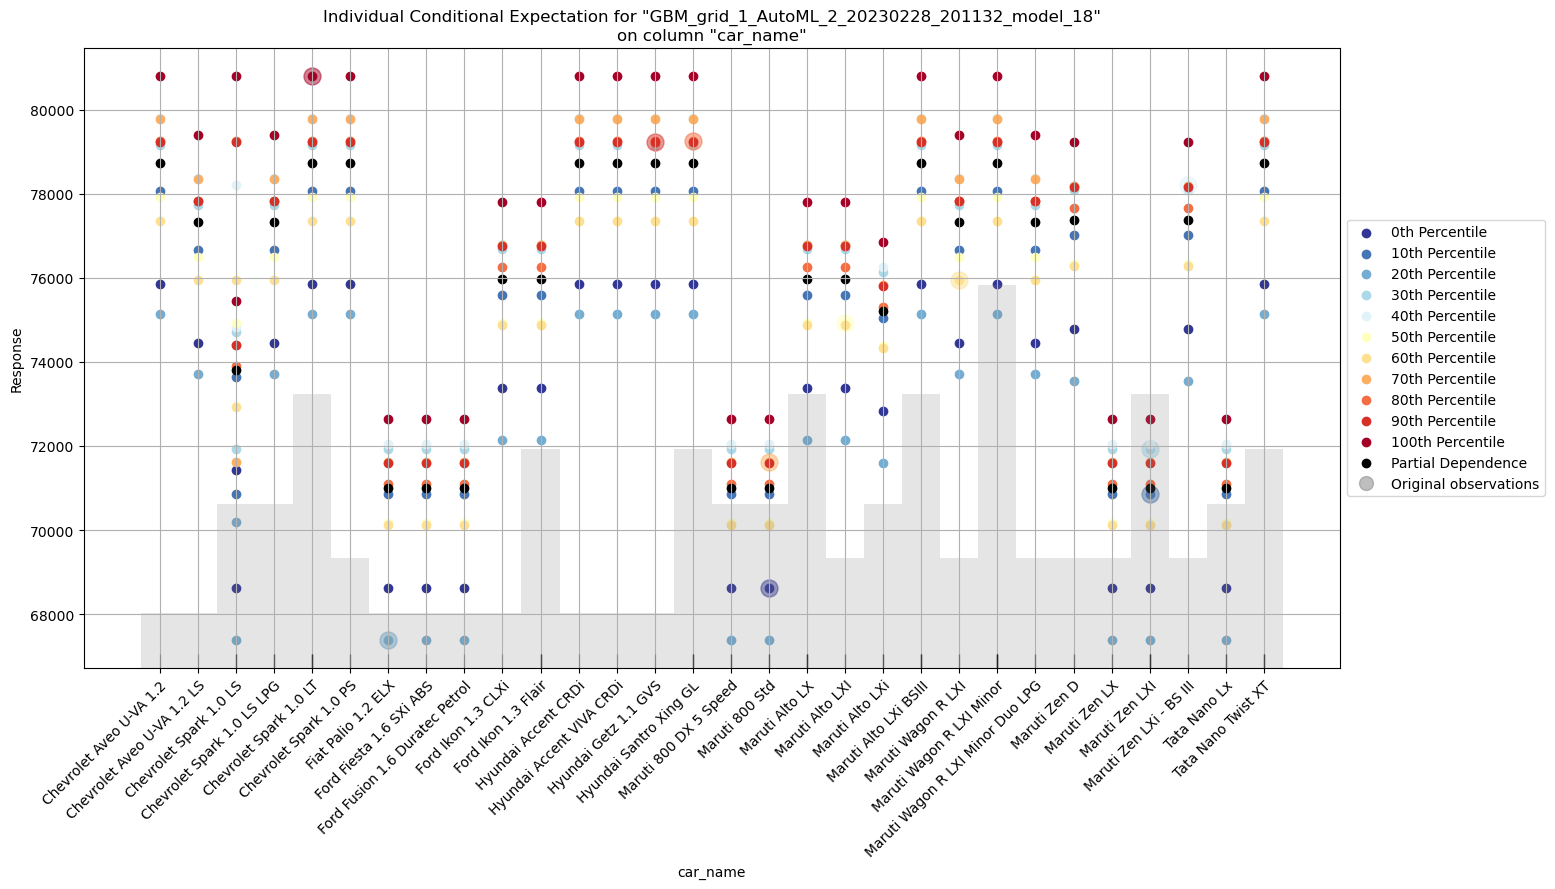

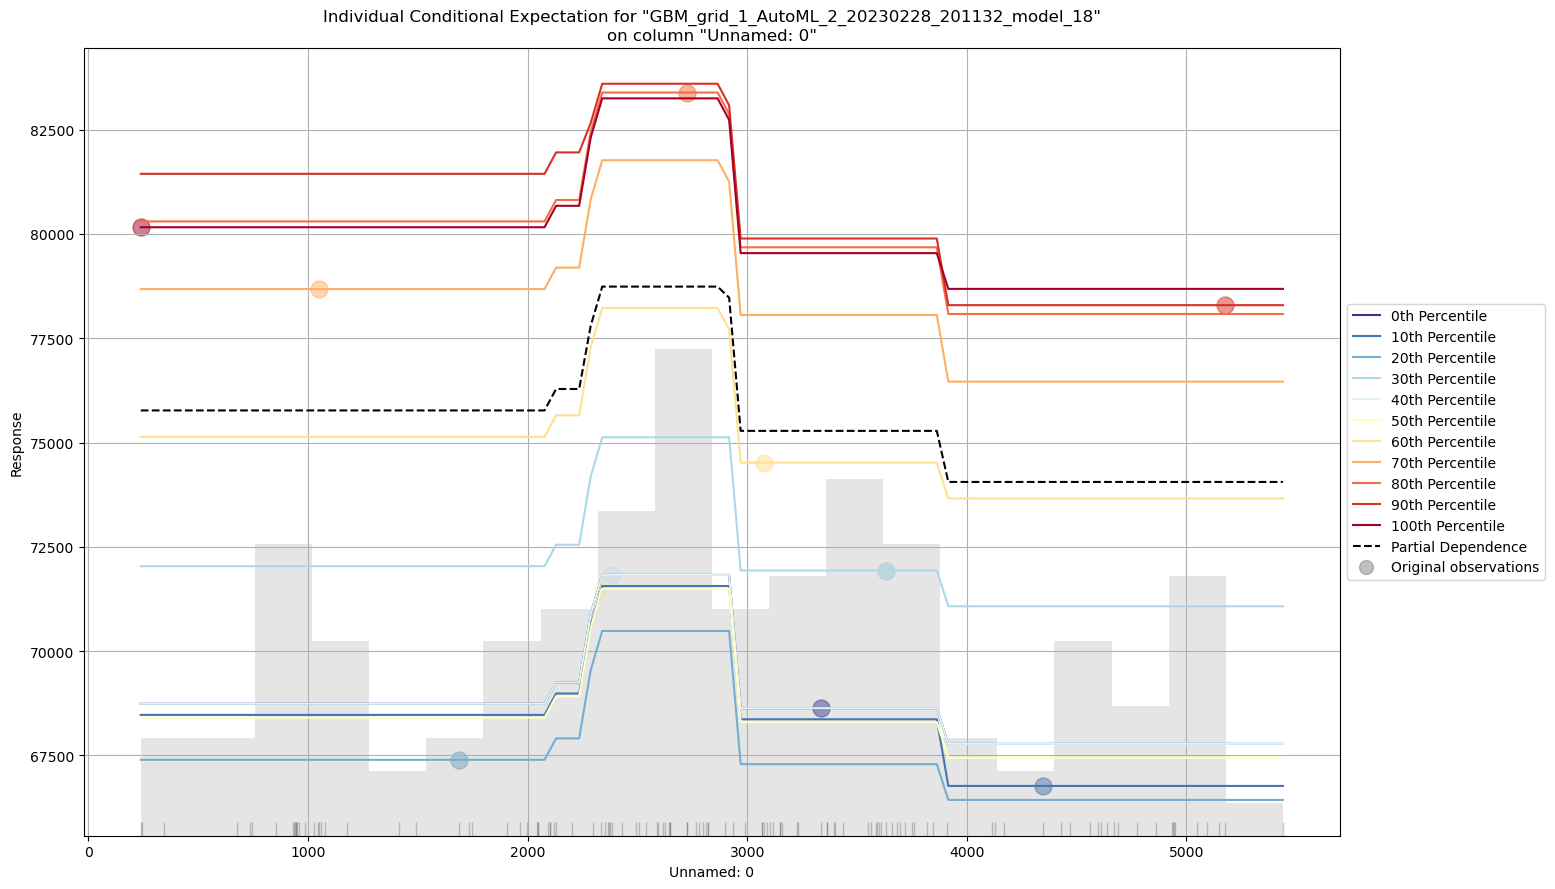

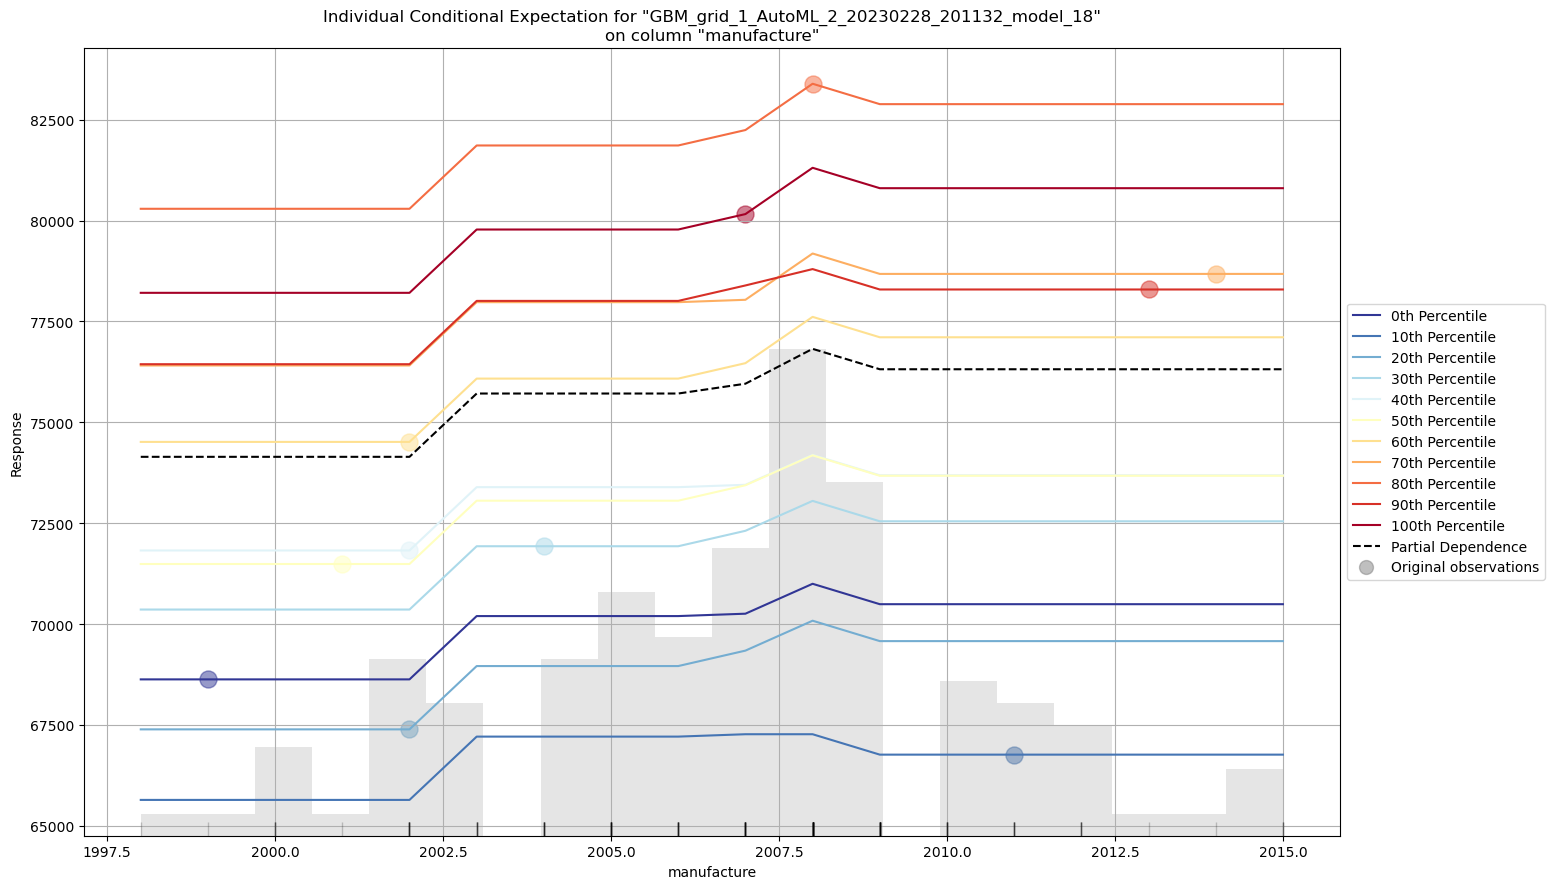

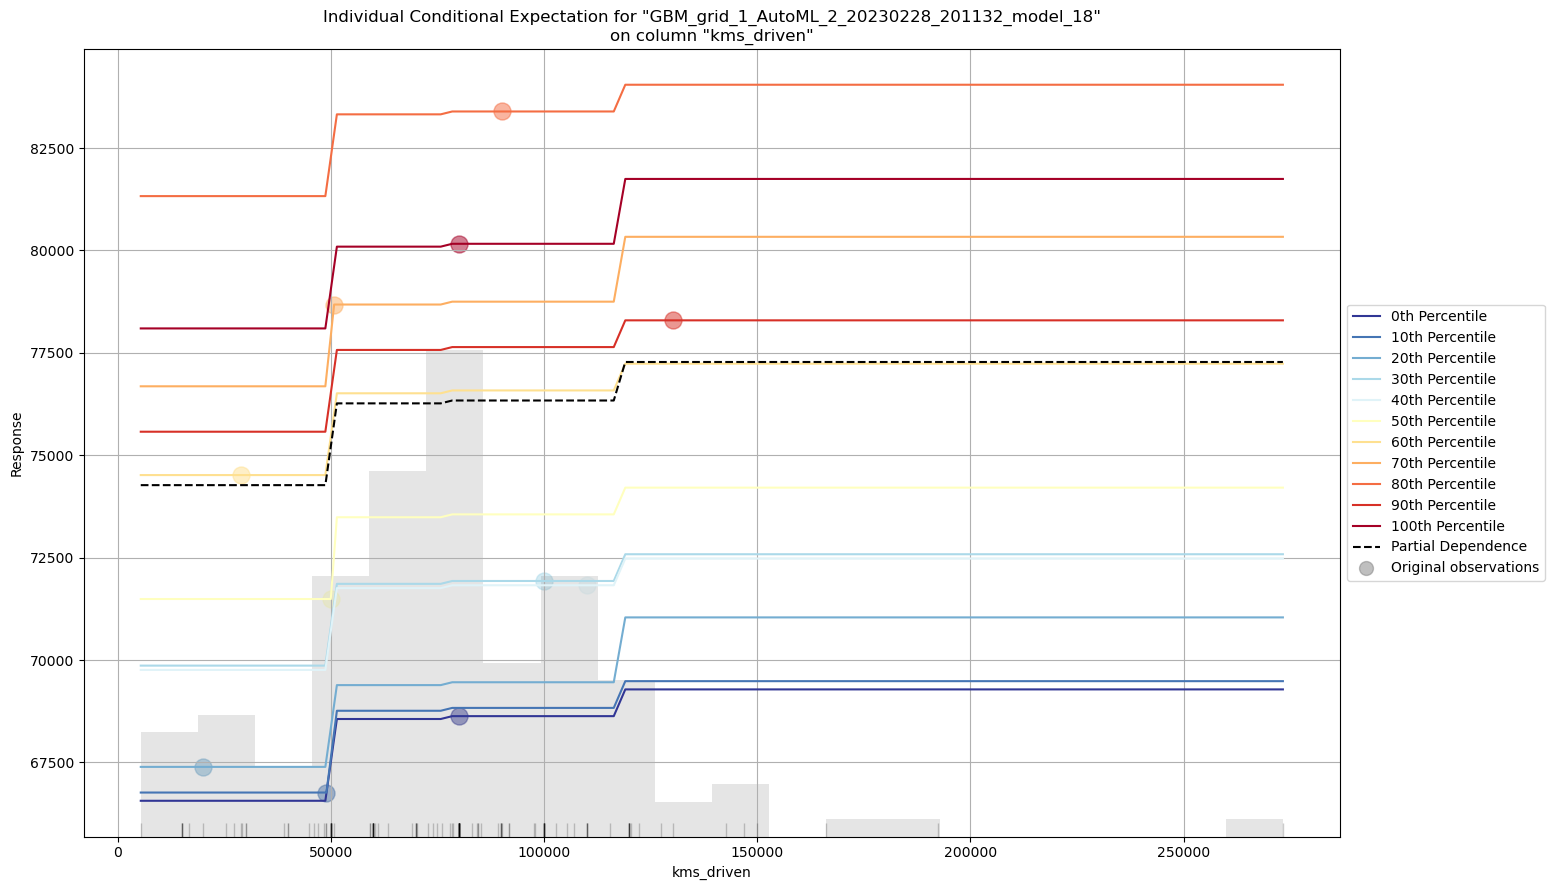

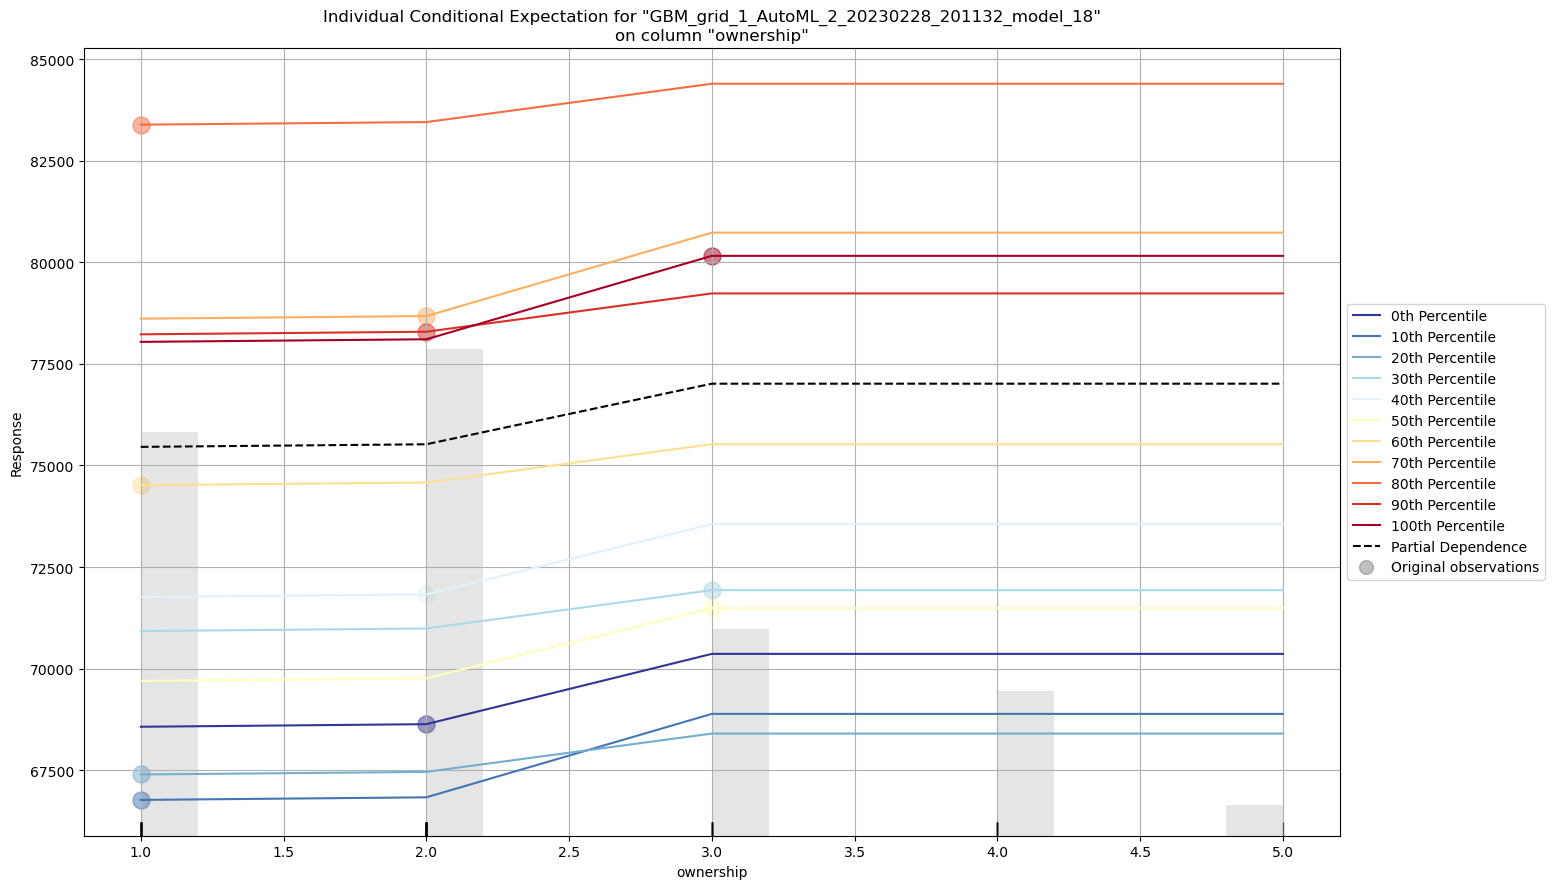

In [272]:
from h2o.estimators import H2ORandomForestEstimator
model_explain = aml.explain(data)

In [274]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

## Hyperparameters 
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [275]:
#Create the random grid
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
